DS7331 - Lab 1<br>
Submitted by: Shravan Reddy, Samira Zarandioon, Jaime Villanueva
<br><br>
<center><h1> Forest Cover Type Analysis </h1></center>



<a id='toc'></a>
# Table of Contents

1. [Introduction](#Introduction)<br>
2. [Business Understanding](#Business_Understanding)<br>
3. [Data Description](#Data_Description)
4. [Data Quality](#Data_Quality)<br>
5. [Basic Statistics and Visualizations](#Basic_Stats)<br>
6. [Attributes of Interest](#Attribute_Interest)<br>
7. [Attribute - Attribute Relationships](#Attribute_Attribute)<br>
8. [Attribute - Response Relationships](#Attribute_Response)<br>
9. [Additional Features](#Additional_Features)<br>
10. [Exceptional Work](#Exceptional_Work)

<a id='Introduction'></a>
# Introduction

The Roosevelt Natonal Forest is located about 100 miles northwest of Denver, Colorado, and is an area of more than 800,000 acres of land. The areas of interest in this forest for this analysis are the four wilderness areas, Rawah, Comanche Peak, Neota, and Cache la Poudre. A wilderness area is an official legal designation created by the Wilderness Preservation Act in 1964. This act created the Wilderness Preservation System and sets aside land areas in the United States to be managed and maintained in its natural wild state. This management is administered by four different government agencies: the National Park Service, the U.S. Forest Service (USFS), U.S. Fish and Wildlife Service, and the Bureau of Land Management.

![Wilderness Areas](7331lab1image1.png)
images taken from : https://www.wilderness.net/NWPS/maps

[top](#toc)
<a id='Business_Understanding'></a>
# Business Understanding

Being able to accurately catalog the natural resources of an area is important to land management agencies. In order to maintain the natural state of the forest, the natural resource managers are responsible for developing ecosystem management strategies. This process requires the collection of information from large areas of land in order to properly inventory an ecosystem, however the actual collection of such information can be time and cost prohibitive. Good predictive modeling can serve as an alternate method for creating these necessary inventories.

One of the most basic pieces of information that is collected from wildlife areas is the type of trees that are present. If a predictive model could take other attributes of the land that are either known or are easier to collect, and then use the information from these attributes to accurately predict the type of trees that would be found under those conditions, this has the potential to have a big cost and time saving for the federal agencies managing the area. The data in this analysis was derived from data originally obtained from US Geological Survey (USGS) and USFS data.  The data comes from the aforementioned wilderness areas so they should have minimal human interactions, so we can be more confident that the current forest cover type is more a result of natural ecological processes rather than forest management practices. The data is a combination of information about the terrain with mapping information gathered by agencies using modeling software. Also the type of trees has been collected for these areas, so it is possible to develop a model based on the attributes to predict what type of land cover will be there. Then this can be compared against the actual cover types to get a sense of the accuracy of the model. The model may also be able to weed out any data that is not helpful in the determination of the cover type which could potentially have a cost saving as well. Since the there are several tree types, and the data is a collection of both numerical and categorical, potential models to use would be Linear Discriminant Analysis (LDA), Multi-nomial Regression, or some other classification algorithm such as Artificial Neural Network (ANN).


[top](#toc)
# Data Understanding


<a id='Data_Description'></a>
## Data Description

This data was taken from the UCI Machine Learning Archive: https://archive.ics.uci.edu/ml/datasets/covertype<br>

Data can be downloaded from here: https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/<br>

References for data information:<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info<br>
http://web.cs.ucdavis.edu/~matloff/matloff/public_html/132/Data/ForestCover/BlackardDean.pdf

The four wilderness areas that the data was taken from vary greatly in size. The Rawah wilderness area is 73,213 acres. Comanche Peak is 67,680 acres. Neota is 9647 acres, and Cache la Poudre is 9433 acres. Each record is defined by a 30 x 30 meter cell from a computer model used by the USGS. This cell is directly defined by a digital elevation model (DEM) and is the source for the elevation attribute. All other attributes are based on this 30 x 30 meter cell. There are a total of 581,012 records each representing a cell.

There are ten numeric attributes which measure position relative to various features for each cell, as well as the amount of light at three different times of day during the summer solstice. The light measure is an index estimated by computer models. Also recorded is the amount of slope in each cell.

There are three different categorical attributes listed as well as two that are hidden. One of the categorical attributes is the cover type which is the variable that is being predicted. There are seven types of trees listed each being represented by an integer. The other categorical features are wilderness area and soil type both of which come dummy encoded in the data. There are four wilderness areas and forty soil types. The hidden categorical data are the climate zone and geologic zone which can be deduced from the USFS Ecological Landtype Unit (ELU) code listed for each soil type. The details for the attributes are listed below.

Attribute information:  
  
  Name  | Data Type | Measurement | Description 
  :------------- | :------------- | ------------- | -------------
Elevation  | quantitative  | meters  | Elevation in meters
Aspect  | quantitative  | azimuth  | Aspect in degrees azimuth
Slope  | quantitative  | degrees  | Slope in degrees
Horizontal_Distance_To_Hydrology  | quantitative  | meters  | Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology  | quantitative  | meters  | Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways  | quantitative  | meters  | Horz Dist to nearest roadway
Hillshade_9am  | quantitative  | 0 to 255 index  | Hillshade index at 9am, summer solstice
Hillshade_Noon  | quantitative  | 0 to 255 index  | Hillshade index at noon, summer soltice
Hillshade_3pm  | quantitative  | 0 to 255 index  | Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points  | quantitative  | meters  | Horz Dist to nearest wildfire ignition points
Rawah Wilderness Area  | qualitative  | 0 (absence) or 1 (presence)  | Wilderness area designation
Neota Wilderness Area  | qualitative  | 0 (absence) or 1 (presence)  | Wilderness area designation
Comanche Peak Wilderness Area  | qualitative  | 0 (absence) or 1 (presence)  | Wilderness area designation
Cache la Poudre Wilderness Area  | qualitative  | 0 (absence) or 1 (presence)  | Wilderness area designation
Soil_Type (40 binary columns)  | qualitative  | 0 (absence) or 1 (presence)  | Soil Type designation
Cover_Type (7 types)  | integer  | 1 to 7  | Forest Cover Type designation

Code Designations:
    
Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:

  Study Code  | USFS ELU Code | Description 
  ------------- |-------------| ------------- 
1  | 2702  | Cathedral family - Rock outcrop complex, extremely stony.
	 2  | 2703  | Vanet - Ratake families complex, very stony.
	 3  | 2704  | Haploborolis - Rock outcrop complex, rubbly.
	 4  | 2705  | Ratake family - Rock outcrop complex, rubbly.
	 5  | 2706  | Vanet family - Rock outcrop complex complex, rubbly.
	 6  | 2717  | Vanet - Wetmore families - Rock outcrop complex, stony.
	 7  | 3501  | Gothic family.
	 8  | 3502  | Supervisor - Limber families complex.
	 9  | 4201  | Troutville family, very stony.
	10  | 4703  | Bullwark - Catamount families - Rock outcrop complex, rubbly.
	11  | 4704  | Bullwark - Catamount families - Rock land complex, rubbly.
	12  | 4744  | Legault family - Rock land complex, stony.
	13  | 4758  | Catamount family - Rock land - Bullwark family complex, rubbly.
	14  | 5101  | Pachic Argiborolis - Aquolis complex.
	15  | 5151  | unspecified in the USFS Soil and ELU Survey.
	16  | 6101  | Cryaquolis - Cryoborolis complex.
	17  | 6102  | Gateview family - Cryaquolis complex.
	18  | 6731  | Rogert family, very stony.
	19  | 7101  | Typic Cryaquolis - Borohemists complex.
	20  | 7102  | Typic Cryaquepts - Typic Cryaquolls complex.
	21  | 7103  | Typic Cryaquolls - Leighcan family, till substratum complex.
	22  | 7201  | Leighcan family, till substratum, extremely bouldery.
	23  | 7202  | Leighcan family, till substratum - Typic Cryaquolls complex.
	24  | 7700  | Leighcan family, extremely stony.
	25  | 7701  | Leighcan family, warm, extremely stony.
	26  | 7702  | Granile - Catamount families complex, very stony.
	27  | 7709  | Leighcan family, warm - Rock outcrop complex, extremely stony.
	28  | 7710  | Leighcan family - Rock outcrop complex, extremely stony.
	29  | 7745  | Como - Legault families complex, extremely stony.
	30  | 7746  | Como family - Rock land - Legault family complex, extremely stony.
	31  | 7755  | Leighcan - Catamount families complex, extremely stony.
	32  | 7756  | Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
	33  | 7757  | Leighcan - Catamount families - Rock outcrop complex, extremely stony.
	34  | 7790  | Cryorthents - Rock land complex, extremely stony.
	35  | 8703  | Cryumbrepts - Rock outcrop - Cryaquepts complex.
	36  | 8707  | Bross family - Rock land - Cryumbrepts complex, extremely stony.
	37  | 8708  | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
	38  | 8771  | Leighcan - Moran families - Cryaquolls complex, extremely stony.
	39  | 8772  | Moran family - Cryorthents - Leighcan family complex, extremely stony.
	40  | 8776  | Moran family - Cryorthents - Rock land complex, extremely stony

Forest Cover Type Classes:

Measurement | Description 
  ------------- | ------------- 
1  | Spruce/Fir  
2  | Lodgepole Pine  
3  | Ponderosa Pine  
4  | Cottonwood/Willow
5  | Aspen  
6  | Douglas-fir  
7  | Krummholz  

Note:

|First digit:  climatic zone|Second digit:  geologic zones|
|--|--|
|<table> <tr><th>First digit</th><th>climatic zone</th></tr><tr><td>1</td><td>lower montane dry</td></tr><tr><td>2</td><td>lower montane</td></tr><tr><td>3</td><td>montane dry</td></tr><tr><td>4</td><td>montane</td></tr><tr><td>5</td><td>montane dry and montane</td></tr><tr><td>6</td><td>montane and subalpine</td></tr><tr><td>7</td><td>subalpine</td></tr><tr><td>8</td><td>alpine</td></tr> </table>| <table> <tr><th>Second digit</th><th>geologic zones</th></tr><tr><td>1</td><td>alluvium</td></tr><tr><td>2</td><td>glacial</td></tr><tr><td>3</td><td>shale</td></tr><tr><td>4</td><td>sandstone</td></tr><tr><td>5</td><td>mixed sedimentary</td></tr><tr><td>6</td><td>unspecified in the USFS ELU Survey</td></tr><tr><td>7</td><td>igneous and metamorphic</td></tr><tr><td>8</td><td>volcanic</td></tr> </table>

[top](#toc)
<a id='Data_Quality'></a>
## Data Quality

Because the data came from the a machine learning repository, it is already clean, but there are not any headings for the columns. It is advertised as having no missing data, and this is verified with code. Also the categorical predictors are already dummy coded. For certain analysis techniques, this is nice, but many of the visualizations planned seemed easier without the dummy coding. Therefore after the data is read and labeled, the categorical attributes were collapsed. Also the two hidden categorical attributes were added.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#Read in the .data file into a pandas dataframe
df = pd.read_csv('data/covtype.data', header = None)

#### Check for missing data and duplicates

In [3]:
# to check if there is any missing value inf df
df.isnull().values.any()
# there is no missing value

False

In [4]:
# to get number of duplicated rows in df
len(df[df.duplicated()])
# there is no duplicated row

0

#### Label the columns

In [5]:
#Create Names for the columns based on covtypeinfo.txt
quantitative = ['Elevation', 'Aspect', 'Slope', 'hDistance_to_Hydrology', 'vDistance_to_Hydrology', \
                    'hDistance_to_Roads', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'hDistance_to_Fire Points']
wilderness_area = ['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre'] 

soil_type = ['Soil Type ' + str(i) for i in range(1,41)]

cover_type = ['Cover_Type']

#Assign names to columns 
df.columns = quantitative + wilderness_area + soil_type  + cover_type

#### Undoing the dummy coding

In [6]:
#Preparing the dataframe with no dummy coding

#Create separate df preparing for reversing dummy coding for categorical variables
df_wilderness_area = df.iloc[:,10:14]
df_soil_type = df.iloc[:,14:54]


#Reverse dummy coding for wilderness area and soil type
df['Wilderness_Area'] = pd.Series(df_wilderness_area.columns[np.where(df_wilderness_area !=0)[1]])
df['Soil_Type'] = pd.Series(df_soil_type.columns[np.where(df_soil_type !=0)[1]])

#### Replacing cover type integer values with names

In [7]:
#Map Cover Type Names into new column
cover_type_map = {1:"Spruce/Fir", 2:"Lodgepole Pine", 3:"Ponderosa Pine", 4:"Cottonwood/Willow", 5:"Aspen", \
                 6:"Douglas-fir", 7:"Krummholz"}
df['Cover Type Names'] = df['Cover_Type'].map(cover_type_map)

#### Creating climatic and geologic attributes from hidden categorical data

In [8]:
#Map ELU codes into new column which will be used to generate columns for climatic and geological zones
elu_map = {"Soil Type 1": "2702", "Soil Type 2":"2703", "Soil Type 3": "2704", "Soil Type 4":"2705", "Soil Type 5":"2706", \
           "Soil Type 6":"2717", "Soil Type 7":"3501", "Soil Type 8":"3502", "Soil Type 9":"4201", "Soil Type 10": "4703", \
           "Soil Type 11":"4704", "Soil Type 12":"4744", "Soil Type 13":"4758", "Soil Type 14":"5101", "Soil Type 15": "5151", \
           "Soil Type 16":"6101", "Soil Type 17":"6102", "Soil Type 18":"6731", "Soil Type 19":"7101", "Soil Type 20": "7102", \
           "Soil Type 21":"7103", "Soil Type 22":"7201", "Soil Type 23":"7202", "Soil Type 24":"7700", "Soil Type 25": "7701", \
           "Soil Type 26":"7702", "Soil Type 27":"7709", "Soil Type 28":"7710", "Soil Type 29":"7745", "Soil Type 30": "7746", \
           "Soil Type 31":"7755", "Soil Type 32":"7756", "Soil Type 33":"7757", "Soil Type 34":"7790", "Soil Type 35": "8703", \
           "Soil Type 36":"8707", "Soil Type 37":"8708", "Soil Type 38":"8771", "Soil Type 39":"8772", "Soil Type 40": "8776" }          
df['ELU Codes'] = df['Soil_Type'].map(elu_map)

#Create Climatic Zone column and map values into it
climatic_map = {"1":"Lower Montane Dry", "2":"Lower Montane", "3":"Montane Dry", "4":"Montane", \
            "5":"Montane Dry and Montane", "6":"Montane and Subalpine", "7":"Subalpine", "8":"Alpine"}

climatic_zone = []
for record in df['ELU Codes']:      #creates list from first digits of the ELU code
    climatic_zone.append(record[0])
df['Climatic_Zone'] = climatic_zone #column is filled with first digits of ELU code
df['Climatic_Zone'] = df['Climatic_Zone'].map(climatic_map) #map first digits to description

#Create Geologic Zone column and map values into it
geologic_map = {"1":"Alluvium", "2":"Glacial", "3":"Shale", "4":"Sandstone", "5":"Mixed Sedimentary", "6":"Unspecified", \
                "7":"Igneous and Metamorphic", "8":"Volcanic"} 

geologic_zone = []
for record in df['ELU Codes']:      #creates list from second digits of the ELU code
    geologic_zone.append(record[1])
df['Geologic_Zone'] = geologic_zone #column is filled with first digits of ELU code
df['Geologic_Zone'] = df['Geologic_Zone'].map(geologic_map) #map first digits to description

#### Dropping columns not needed, defining categorical types, and re-ordering columns

In [9]:
#Drop dummy coded columns for wilderness area and soil type and the cover type column with integer values
df = df.drop(wilderness_area, axis=1)
df = df.drop(soil_type, axis=1)
df = df.drop('Cover_Type', axis=1)
df = df.drop('ELU Codes', axis=1)

#Make categorical as category type
df['Wilderness_Area'] = df['Wilderness_Area'].astype('category')
df['Soil_Type'] = df['Soil_Type'].astype('category')
df['Cover Type Names'] = df['Cover Type Names'].astype('category')
df['Climatic_Zone'] = df['Climatic_Zone'].astype('category')
df['Geologic_Zone'] = df['Geologic_Zone'].astype('category')

#Make the response variable last and rename to Cover Type
df['Cover_Type'] = df['Cover Type Names']
df = df.drop('Cover Type Names', axis=1)

#### The final prepared dataset for analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 15 columns):
Elevation                   581012 non-null int64
Aspect                      581012 non-null int64
Slope                       581012 non-null int64
hDistance_to_Hydrology      581012 non-null int64
vDistance_to_Hydrology      581012 non-null int64
hDistance_to_Roads          581012 non-null int64
Hillshade_9am               581012 non-null int64
Hillshade_Noon              581012 non-null int64
Hillshade_3pm               581012 non-null int64
hDistance_to_Fire Points    581012 non-null int64
Wilderness_Area             581012 non-null category
Soil_Type                   581012 non-null category
Climatic_Zone               581012 non-null category
Geologic_Zone               581012 non-null category
Cover_Type                  581012 non-null category
dtypes: category(5), int64(10)
memory usage: 47.1 MB


In [11]:
df.head().transpose()

,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
hDistance_to_Hydrology,258,212,268,242,153
vDistance_to_Hydrology,0,-6,65,118,-1
hDistance_to_Roads,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
hDistance_to_Fire Points,6279,6225,6121,6211,6172


<br><br>
Before doing any analysis we check again to make sure there is no missing or duplicate data after all our data manipulation. If there were either of those, that record would have to be investigated to see if it should be kept or deleted.

In [12]:
# to check if there is any missing value inf df
df.isnull().values.any()
# there is no missing value

False

In [13]:
# to get number of duplicated rows in df
len(df[df.duplicated()])
# there is no duplicated row

0

#### Outliers

The outliers are probably better determined by looking at quick box plots and comparing to basic statistics, but we run some arbitrary numbers first to just get a feel for the data. We used nine times the standard deviation as the benchmark for outlier. Of course, whether this is a big number and whether it is an outlier or not depends on the spread. Do it this way returned forty-five outliers which considering the size of the data set would seem pretty good. But we will a more visual approach as well.

In [15]:
numeric_df = df[quantitative]
outliers = numeric_df[(np.abs( numeric_df-numeric_df.mean())> (9*numeric_df.std())).any(axis=1)]
outliers

,Elevation,Aspect,Slope,hDistance_to_Hydrology,vDistance_to_Hydrology,hDistance_to_Roads,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,hDistance_to_Fire Points
220084,2954,290,31,845,581,939,121,219,230,2438
220445,2960,286,27,854,588,953,134,226,227,2408
220812,2963,279,23,864,589,960,152,236,221,2379
221187,2949,288,28,847,573,940,132,225,227,2343
221188,2963,283,19,874,588,968,164,237,212,2350
221567,2955,293,25,859,583,949,143,225,219,2314
221956,2949,305,23,845,574,930,149,220,208,2278
221957,2960,295,21,872,587,959,155,229,212,2285
222355,2948,311,23,832,576,914,151,217,202,2242
222356,2956,308,19,859,585,942,165,225,199,2249


In [16]:
# fields that their value is >= 9
outliers_fields = np.abs(outliers-numeric_df.mean())/numeric_df.std()
outliers_fields

,Elevation,Aspect,Slope,hDistance_to_Hydrology,vDistance_to_Hydrology,hDistance_to_Roads,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,hDistance_to_Fire Points
220084,0.019163,1.200418,2.256377,2.707944,9.170238,0.905013,3.404797,0.218462,2.285377,0.345651
220445,0.002267,1.164676,1.722206,2.750287,9.290316,0.896035,2.919177,0.135633,2.206996,0.322995
220812,0.012982,1.102128,1.188035,2.797335,9.307470,0.891545,2.246780,0.641483,2.050234,0.301095
221187,0.037021,1.182547,1.855749,2.717354,9.033005,0.904372,2.993888,0.085048,2.206996,0.273909
221188,0.012982,1.137869,0.653865,2.844383,9.290316,0.886415,1.798515,0.692068,1.815091,0.279195
221567,0.015591,1.227224,1.455121,2.773811,9.204546,0.898600,2.582979,0.085048,1.997980,0.252009
221956,0.037021,1.334449,1.188035,2.707944,9.050160,0.910785,2.358846,0.167877,1.710582,0.224822
221957,0.002267,1.245095,0.920950,2.834973,9.273162,0.892187,2.134714,0.287388,1.815091,0.230109
222355,0.040593,1.388062,1.188035,2.646782,9.084468,0.921047,2.284135,0.319632,1.553820,0.197636
222356,0.012020,1.361256,0.653865,2.773811,9.238854,0.903089,1.761160,0.085048,1.475439,0.202922


In [17]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 220084 to 483577
Data columns (total 10 columns):
Elevation                   45 non-null int64
Aspect                      45 non-null int64
Slope                       45 non-null int64
hDistance_to_Hydrology      45 non-null int64
vDistance_to_Hydrology      45 non-null int64
hDistance_to_Roads          45 non-null int64
Hillshade_9am               45 non-null int64
Hillshade_Noon              45 non-null int64
Hillshade_3pm               45 non-null int64
hDistance_to_Fire Points    45 non-null int64
dtypes: int64(10)
memory usage: 3.9 KB


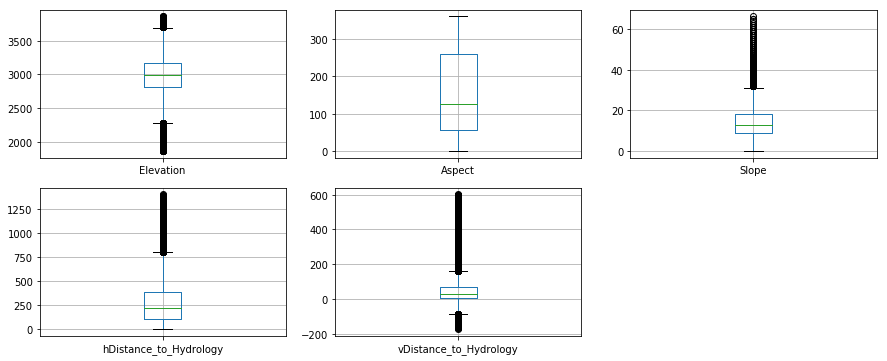

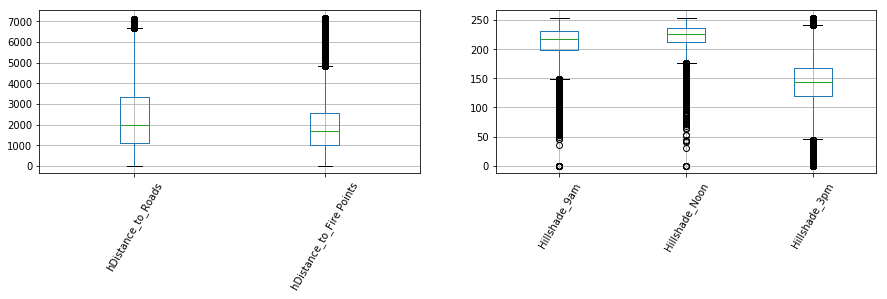

In [18]:
# Boxplots of quantitative attributes
%matplotlib inline
vars_to_plot_separate1 = [['Elevation'],
                         ['Aspect'], 
                         ['Slope'],
                         ['hDistance_to_Hydrology'], 
                         ['vDistance_to_Hydrology']]
                                                 
vars_to_plot_separate2 = [['hDistance_to_Roads','hDistance_to_Fire Points'],
                         ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]
plt.figure(figsize=(15, 6))
for index, plot_vars in enumerate(vars_to_plot_separate1):
    plt.subplot(len(vars_to_plot_separate1)/2, 
                3, 
                index+1)
    ax = df.boxplot(column=plot_vars) 
plt.show()

plt.figure(figsize=(15, 3))
for index, plot_vars in enumerate(vars_to_plot_separate2):
    plt.subplot(len(vars_to_plot_separate2)/2, 
                2, 
                index+1)
    ax = df.boxplot(column=plot_vars)
    plt.xticks(rotation=60)
plt.show()

Above we can see that many of the attributes display some heavy tails creating skew. Aspect is the only attribute not showing any outliers. This will be verified in the next section with the distribution plots.

[top](#toc)
<a id='Basic_Stats'></a>
## Basic Statistics and Visualizations

First we will consider individually the numeric data, and then the categorical data. There are some basic statistics in the numeric data which are interesting. 

First aspect which was the only attribute in the box plots to not show heavy taling has a standard deviation almost as big as its mean. Since this in degrees and is an angular measure from a reference, this would make the range from 0 t0 360. This means that all the range of values of aspect are about three standard deviations apart. Because this is a positioning measure from a reference point, this may not be significant, but the variance is noteworthy. Other attributes have standard deviations close to their mean and reach out of the interquartile range within a couple of standard deviations, but none are as extreme aspect.

The indexes for hillshade are interesting because, like aspect, the values are bounded; the index for hillshade is between 0 and 254. But unlike aspect, these indexes have a standard deviation that is much smaller than the mean and the interquartile range is pretty tight. The standard deviation is smallest for the measurement at noon when the sun is near directly overhead. This would produce the least amount of variation in the measurement and that is reflected in the values.

The last attribute that jumps out is the vertical distance to hydrology because it ranges into negative numbers. This means that the sometimes the mean distance is sometimes higher or lower than the water area.

In [22]:
df[quantitative].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
hDistance_to_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
vDistance_to_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
hDistance_to_Roads,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
hDistance_to_Fire Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Distribution plots of all the numeric data were performed and it verifies what we saw in the box plots and in the statistical summaries. The variation for aspect is big and there is heavy tailing present for most of the other distributions. Only the amount of light at 3:00 PM looks approximately normal. This real data emphasizes the importance of the central limit theorem if needing to do an analysis where one of the assumptions is normality.

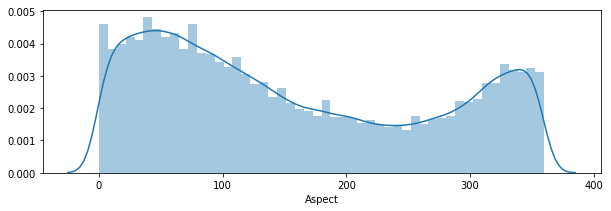

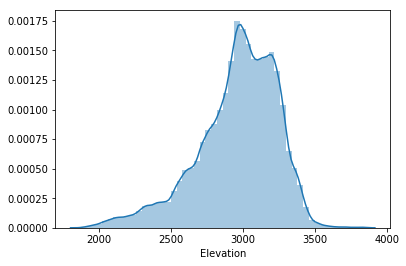

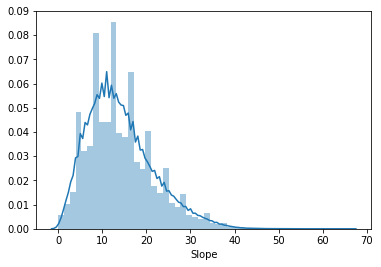

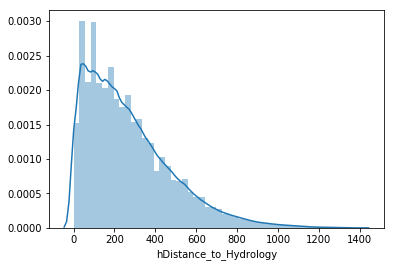

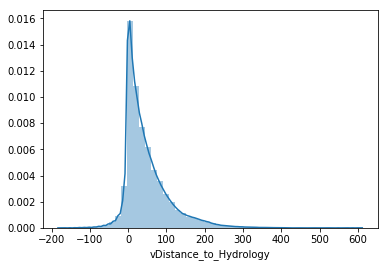

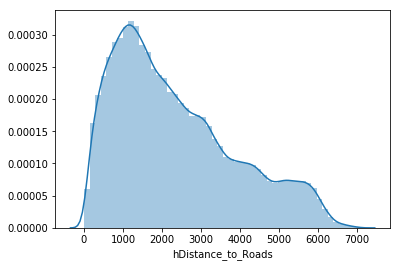

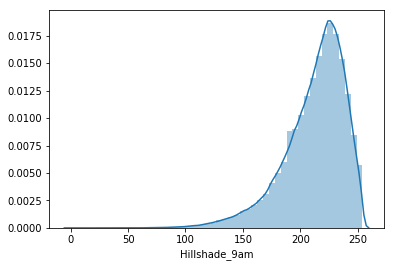

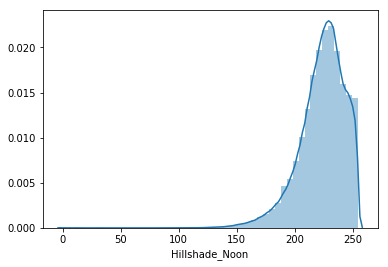

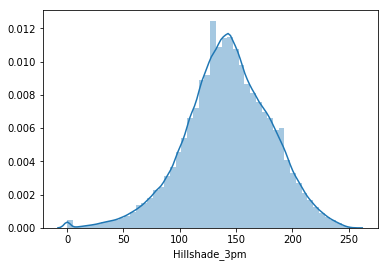

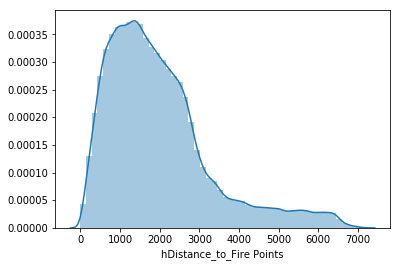

In [23]:
%matplotlib inline
plt.figure(figsize=(10,3))
for i, col in enumerate(df[quantitative]):
    plt.figure(i)
    sns.distplot(df[quantitative][col])

For the categorical data individual analysis is done with basic frequency counts displayed by bar graphs. The first graph clearly shows that most of the data comes from the Rawah and Comanch Peak wilderness areas. This is expected because the acreage from those two areas is larger and thus there can be more 30 x 30 m cells.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

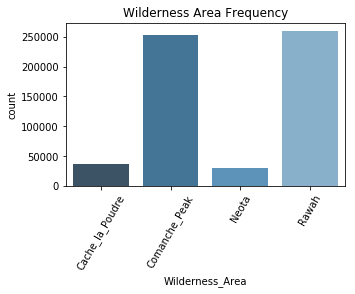

In [17]:
%matplotlib inline
plt.figure(figsize=(5,3))
ax = sns.countplot(x="Wilderness_Area",data=df, palette="Blues_d")
ax.set_title('Wilderness Area Frequency')
plt.xticks(rotation=60)

The next one is soil type, and though there are forty soil types, from the graph, we can estimate the most of the records come from about 25% of the soil types. The most prevalent soil type is number 29 which correlates to: Como - Legault families complex, extremely stony Since this is a stony area, it would be interesting in the relations section to see what wilderness area and tree type grow from this soil. The graph is slightly offset making it look like soil type 28, but running the numbers with a cross-tab show that it should be soil type 29.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

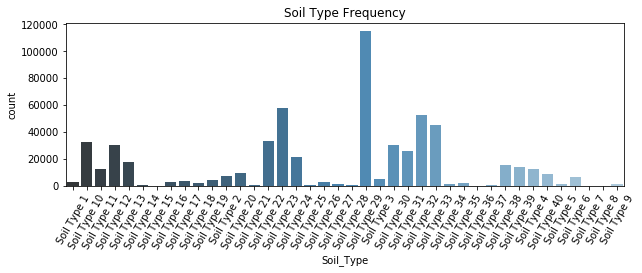

In [18]:
%matplotlib inline
plt.figure(figsize=(10,3))
ax = sns.countplot(x="Soil_Type",data=df, palette="Blues_d")
ax.set_title('Soil Type Frequency')
plt.xticks(rotation=60)

The bar graph shows that a majority of the records come from the subalpine climate zone. The subalpine zone is just below the tree line at high elevations (9000-12000 ft.) and is cool year round.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

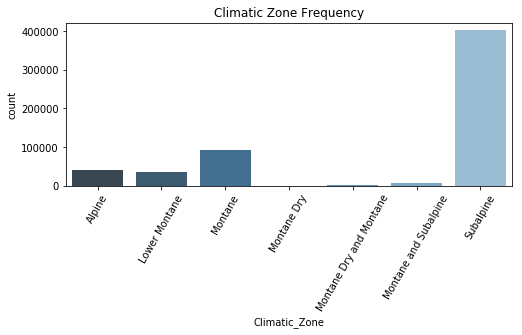

In [19]:
%matplotlib inline
plt.figure(figsize=(8,3))
ax = sns.countplot(x="Climatic_Zone",data=df, palette="Blues_d")
ax.set_title('Climatic Zone Frequency')
plt.xticks(rotation=60)

There is mostly igneous and metamorphic rock in from these wilderness areas. This corresponds with the prevalence of soil type 29 seen in the soil type chart.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

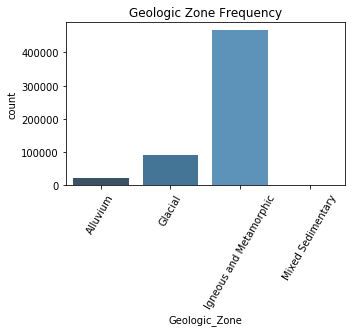

In [20]:
%matplotlib inline
plt.figure(figsize=(5,3))
ax = sns.countplot(x="Geologic_Zone",data=df, palette="Blues_d")
ax.set_title('Geologic Zone Frequency')
plt.xticks(rotation=60)

The graph shows the most of the trees in these wilderness areas are Lodgepole Pine, and Spruce/Fir. This probably means that the Rawah and Comanche Peak areas predominantly have these types. It would be interesting to see whether the other tree types could be predicted with better or worse accuracy than these two.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

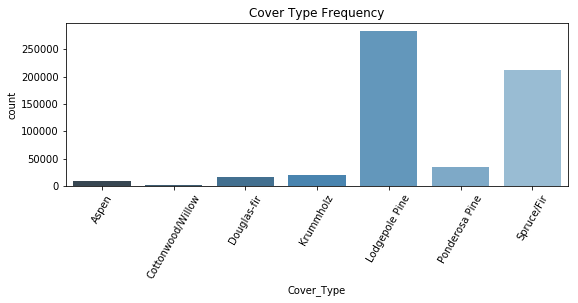

In [21]:
%matplotlib inline
plt.figure(figsize=(9,3))
ax = sns.countplot(x="Cover_Type",data=df, palette="Blues_d")
ax.set_title('Cover Type Frequency')
plt.xticks(rotation=60)

[top](#toc)
<a id='Attribute_Interest'></a>
## Attributes of Interest

#### Cover Type

The cover type is what the other attributes are trying to predict and would be the response for the analysis, but it would be interesting to look at an overall numerical breakdown of tree types. We already saw that Lodgepine and Spruce/Fir occured more frequently, but a percentage breakdown would complete the picture. It would also be interesting to see the most frequent tree types in each wilderness area, climatic zone, and at what elevation.

In [10]:
pd.crosstab(df.Cover_Type, df.Wilderness_Area, margins=True, margins_name="Total")

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah,Total
Cover_Type,,,,,
Aspen,0,5712,0,3781,9493
Cottonwood/Willow,2747,0,0,0,2747
Douglas-fir,9741,7626,0,0,17367
Krummholz,0,13105,2304,5101,20510
Lodgepole Pine,3026,125093,8985,146197,283301
Ponderosa Pine,21454,14300,0,0,35754
Spruce/Fir,0,87528,18595,105717,211840
Total,36968,253364,29884,260796,581012


This a breakdown of the trees in the various wilderness areas by count. Noticeable immediately are the zeros. The cottonwood/willow cover type only occurs in Cache la Poudre. The douglas fir does not occur in Neota and Rawah. This is curious because the biggest areas are Rawah and Comanche Peak, so there must be some other condition difference between Rawah and Comanch Peak that lets the tree only grow in one and not the other. The same circumstance is seen with the Ponderosa Pine. The spruce fir which is the second most populous tree on the list does not occur in Cache la Poudre. Cache la Poudre is looking a little exclusive regarding cover types because neither Krummholz nor Aspen grow there. The numbers here also confirm what the graph showed which is that there are much more Lodgepole Pines and Spruce/Fir cover types.

In [15]:
pd.crosstab(df.Cover_Type, df.Wilderness_Area, margins=True, margins_name="Total", normalize="index")

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah
Cover_Type,,,,
Aspen,0.000000,0.601707,0.000000,0.398293
Cottonwood/Willow,1.000000,0.000000,0.000000,0.000000
Douglas-fir,0.560891,0.439109,0.000000,0.000000
Krummholz,0.000000,0.638957,0.112335,0.248708
Lodgepole Pine,0.010681,0.441555,0.031715,0.516048
Ponderosa Pine,0.600045,0.399955,0.000000,0.000000
Spruce/Fir,0.000000,0.413180,0.087779,0.499042
Total,0.063627,0.436074,0.051434,0.448865


Normalizing the tree type numbers gives the percentage breakdown of tree type per wilderness area by the total of each individual tree type. All the rows should add up to 100%. The majority of the total number of trees are in the Rawah and Comanche Peak area, but these are the biggest areas. The Douglas Fir and Ponderosa Pine are about evenly split between Cache la Poudre and Comanche Peak. The biggest occurrence is with Krummholz where 64% of its trees are in Comanche Peak. The smallest occurrence is with the Lodgepole Pine. Only 1% of it's trees are found in Cache la Poudre.

In [16]:
pd.crosstab(df.Cover_Type, df.Wilderness_Area, margins=True, margins_name="Total", normalize="columns")

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah,Total
Cover_Type,,,,,
Aspen,0.000000,0.022545,0.000000,0.014498,0.016339
Cottonwood/Willow,0.074308,0.000000,0.000000,0.000000,0.004728
Douglas-fir,0.263498,0.030099,0.000000,0.000000,0.029891
Krummholz,0.000000,0.051724,0.077098,0.019559,0.035300
Lodgepole Pine,0.081855,0.493728,0.300663,0.560580,0.487599
Ponderosa Pine,0.580340,0.056441,0.000000,0.000000,0.061537
Spruce/Fir,0.000000,0.345463,0.622239,0.405363,0.364605


The next table is similar except it normalizes the tree types according to the wilderness area numbers so that we can see the breakdown of trees within each area. Each column should add to 100%. Between this table and the table normalized according to row, a better distribution of the trees throughout the wilderness area can be seen. The other important item from this table is that the total column gives the fraction from all the tree types. Therefore, the Lodgepol Pine makes 49% of all the tree types recorded. The Cottnwood/Willow is less than one percent.

#### Soil Type

This categorical variable has forty values, and since the type of soil can affect the plant life, it would be good to get a handle on some of the numbers.

In [18]:
pd.crosstab(df.Soil_Type, df.Wilderness_Area, margins=True, margins_name="Total")

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah,Total
Soil_Type,,,,,
Soil Type 1,3031,0,0,0,3031
Soil Type 10,17914,14720,0,0,32634
Soil Type 11,596,11814,0,0,12410
Soil Type 12,0,0,0,29971,29971
Soil Type 13,0,17176,255,0,17431
Soil Type 14,359,240,0,0,599
Soil Type 15,3,0,0,0,3
Soil Type 16,263,325,117,2140,2845
Soil Type 17,793,2629,0,0,3422


So the big numbers and little numbers are easily determined. Soil type 29 dominates the numbers and soil type 15 only has three occurrences. Soil type 15 is unspecified. The next lowest number is soil type 7 which is the gothic family.
Because there are so many values, it makes it a little harder to read so we will make a partial visual plot to help.

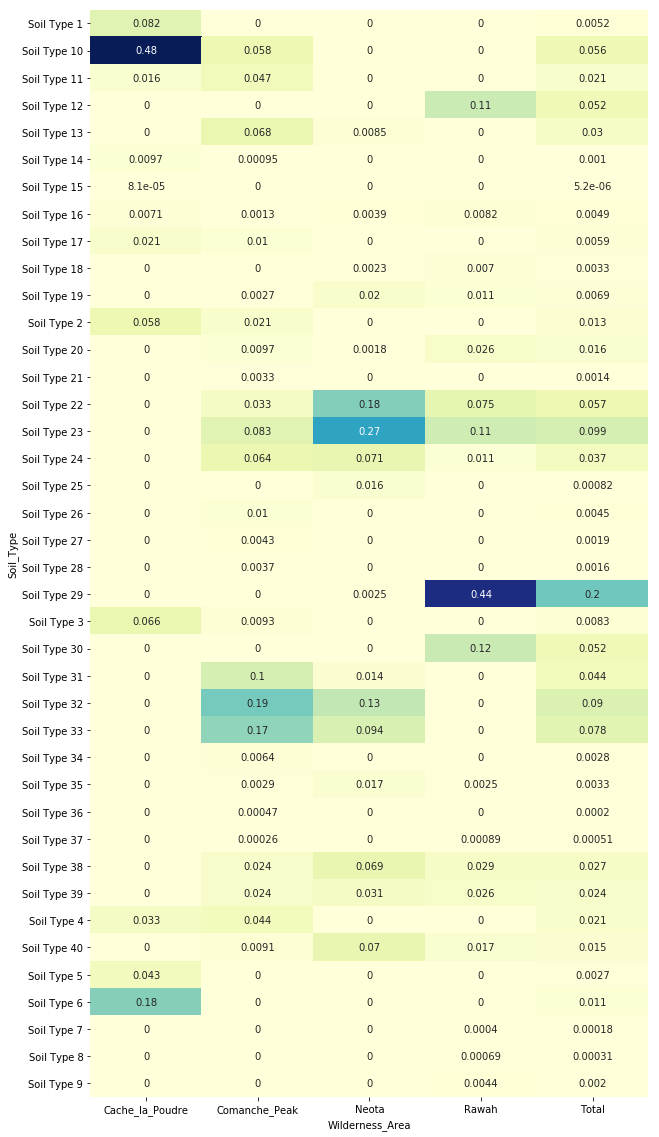

In [24]:
plt.figure(figsize=(10,20))
sns.heatmap(pd.crosstab(df.Soil_Type, df.Wilderness_Area, normalize="columns", margins=True, margins_name="Total"),
            cmap="YlGnBu", annot=True, cbar=False)


The darker colors highlight higher numbers with the level of darkness proportional to the magnitude of percentage. This map makes it a little easier to see that soil type 29 is 20% of all the soil types throughout the wilderness areas, but it is 44% of the soil types in the Rawah area. Soil type 10 is 48% of all the soil in Cache la Poudre. We know from the previous cover type analysis is that this area is more exclusive and is largely made up of Ponderosa Pine. Soil type 10 however is only 6% of the total soil types in all the areas. This makes sense that exclusivity of Cache la Poudre in soil type agrees with its exclusivity in tree type.

#### Aspect

Aspect is the azimuth measured in degrees from a reference point, so it is horizontal angular distance to some reference. This is a positional attribute, but what makes it interesting is its variance. The total range of degrees from 0 to 360 is covered in 3 standard deviations. We'll look at violin plots to visualize this.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

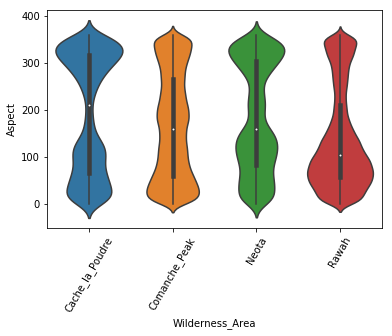

In [31]:
sns.violinplot(data = df, x="Wilderness_Area", y="Aspect")
plt.xticks(rotation=60)

It looks like the distribution is largely bidmodal for all the areas, but if this is an angular distance from a reference line, then interestingly enough, this should represent a positional clustering of areas. This suggests not as many cells across the wilderness areas at 200 degrees from reference, and most around 0 and 360 degrees which are right at the reference line. This probably means that the reference line for this measure is drawn right through the area with the most cells.

#### Elevation

The previous analysis have shown some exclusivity with cover types, soil types, and wilderness area, so it would be interesting to look at the elevation of these areas.


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

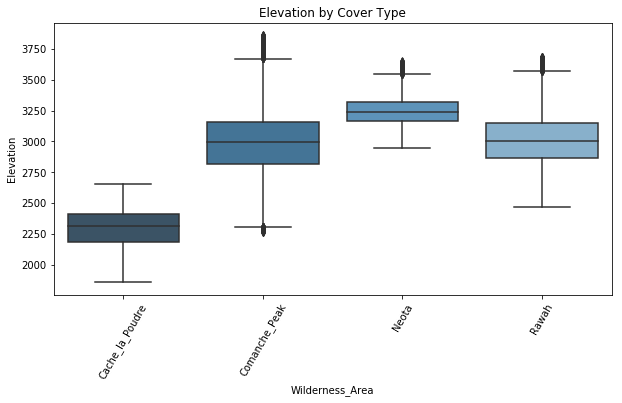

In [32]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Wilderness_Area',y='Elevation',data=df, palette = "Blues_d")
ax.set_title('Elevation by Cover Type')
plt.xticks(rotation=60)

The boxplot shows that the area showing the most exclusivity is also the one with the lowest mean elevation. The two largest areas which have the most number of cover types are at about the same elevation. The neota area has the highest elevation

#### Vertical distance to Hydrology

This attribute had negative values, so it would be interesting to look at boxplots to see what they look like.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

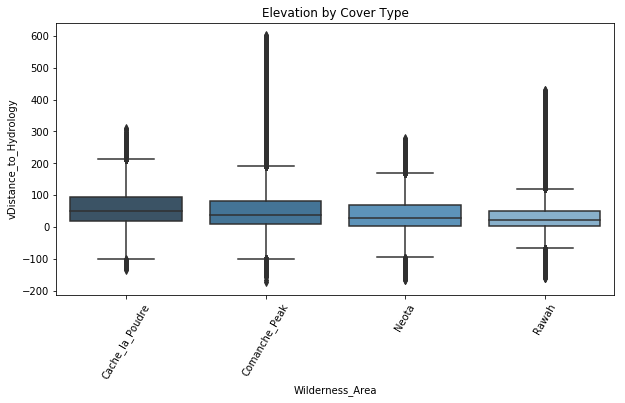

In [33]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Wilderness_Area',y='vDistance_to_Hydrology',data=df, palette = "Blues_d")
ax.set_title('Elevation by Cover Type')
plt.xticks(rotation=60)

The area with the lowest elevation, Cache la Poudre, and the least number of trees, also has the highest mean distance to water. The Comanche Peak area has the most outliers probably marking a very diverse terrain. Comanche Peak, Neota, and Rawah have about the same distance to hydrology. This may have something to do with the big body of water that sits between all of them.

[top](#toc)
<a id='Attribute_Attribute'></a>
## Attribute - Attribute Relationships

In [26]:
pd.crosstab(df.Soil_Type, df.Wilderness_Area, margins=True, margins_name="Total")

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah,Total
Soil_Type,,,,,
Soil Type 1,3031,0,0,0,3031
Soil Type 10,17914,14720,0,0,32634
Soil Type 11,596,11814,0,0,12410
Soil Type 12,0,0,0,29971,29971
Soil Type 13,0,17176,255,0,17431
Soil Type 14,359,240,0,0,599
Soil Type 15,3,0,0,0,3
Soil Type 16,263,325,117,2140,2845
Soil Type 17,793,2629,0,0,3422


**Soil Type 1** and **15** are only present in the **Cache_la_Poudre** wilderness area.  **Soil Type 7**, **8**, **9**, **12**, and **30**,  are only present in the **Rawah** wilderness area.  **Soil Type 14**, **17**, **2**, **3**, and **4**,  are only present in the **Cache_la_Poudre** and **Comanche_Peak** wilderness area.  Only **Soil Type 16** is present in all wilderness areas.

In [27]:
pd.crosstab(df.Soil_Type, df.Wilderness_Area, margins=True, margins_name="Total", normalize='index')

Wilderness_Area,Cache_la_Poudre,Comanche_Peak,Neota,Rawah
Soil_Type,,,,
Soil Type 1,1.000000,0.000000,0.000000,0.000000
Soil Type 10,0.548937,0.451063,0.000000,0.000000
Soil Type 11,0.048026,0.951974,0.000000,0.000000
Soil Type 12,0.000000,0.000000,0.000000,1.000000
Soil Type 13,0.000000,0.985371,0.014629,0.000000
Soil Type 14,0.599332,0.400668,0.000000,0.000000
Soil Type 15,1.000000,0.000000,0.000000,0.000000
Soil Type 16,0.092443,0.114236,0.041125,0.752197
Soil Type 17,0.231736,0.768264,0.000000,0.000000


In [8]:
df_sample = df.sample(frac=0.02, replace=True, random_state=1) #sample with 10% of the data ~58,000 lines
df_sample.shape

(11620, 15)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


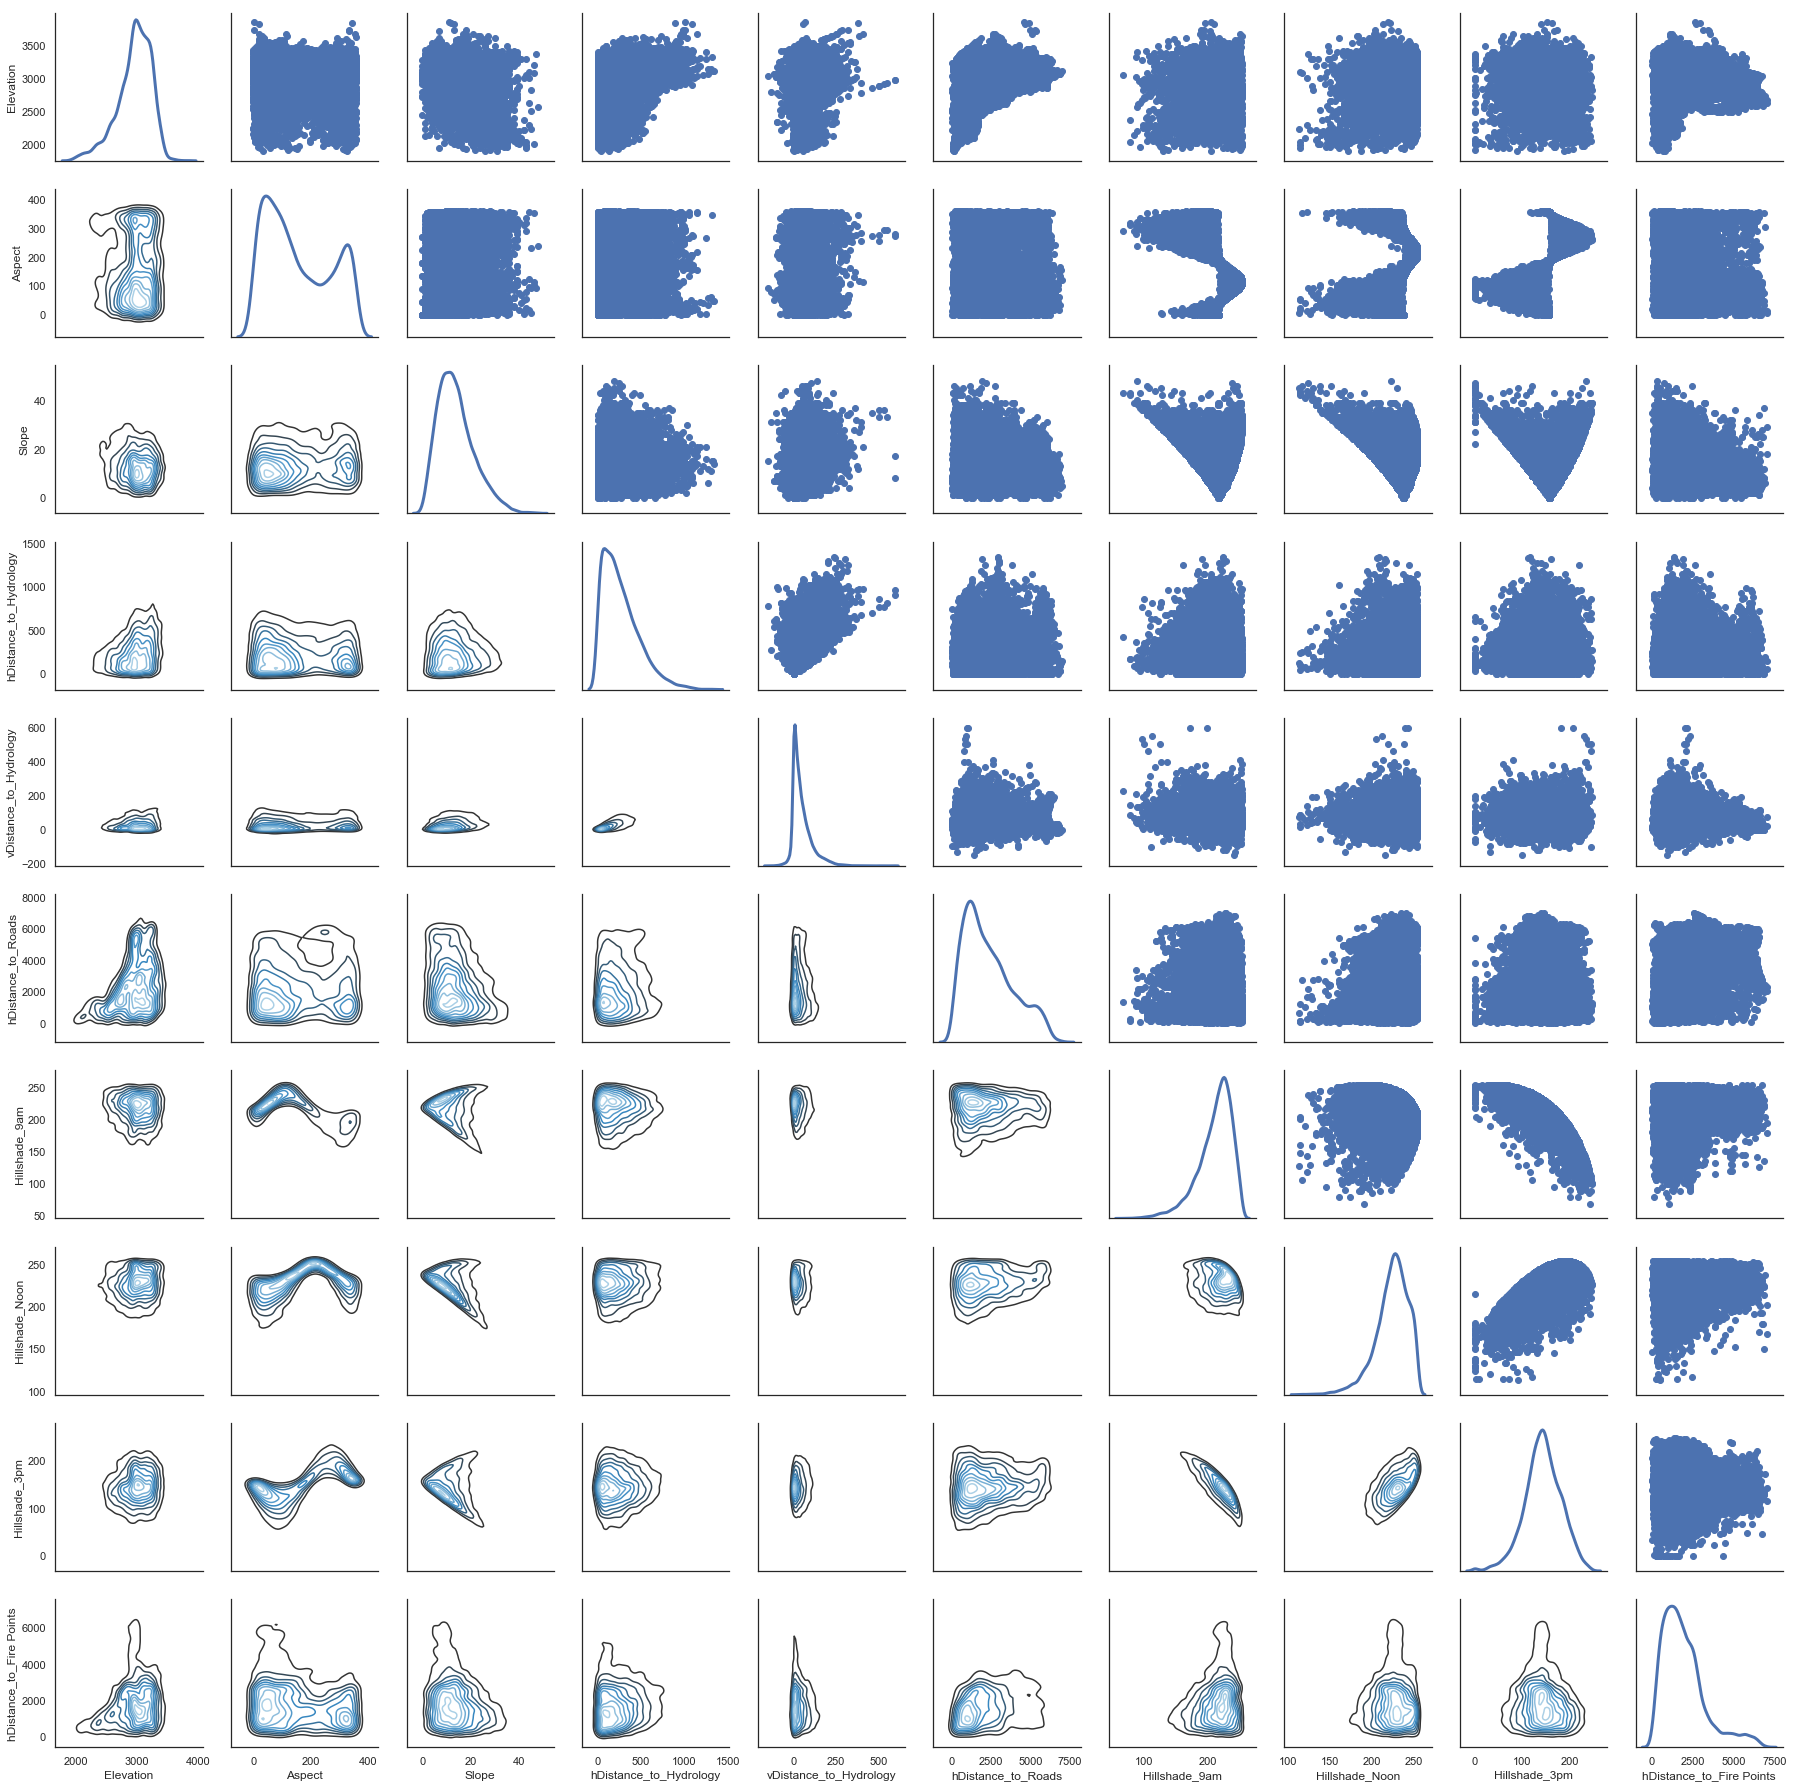

In [18]:
sns.set(style="white")

g = sns.PairGrid(df_sample[quantitative], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal

We can see the bimodal nature of aspect and how it relates to the other continuous variables throug this plot. Also we can quickly see some positive and negative correlation for the hillshade index.

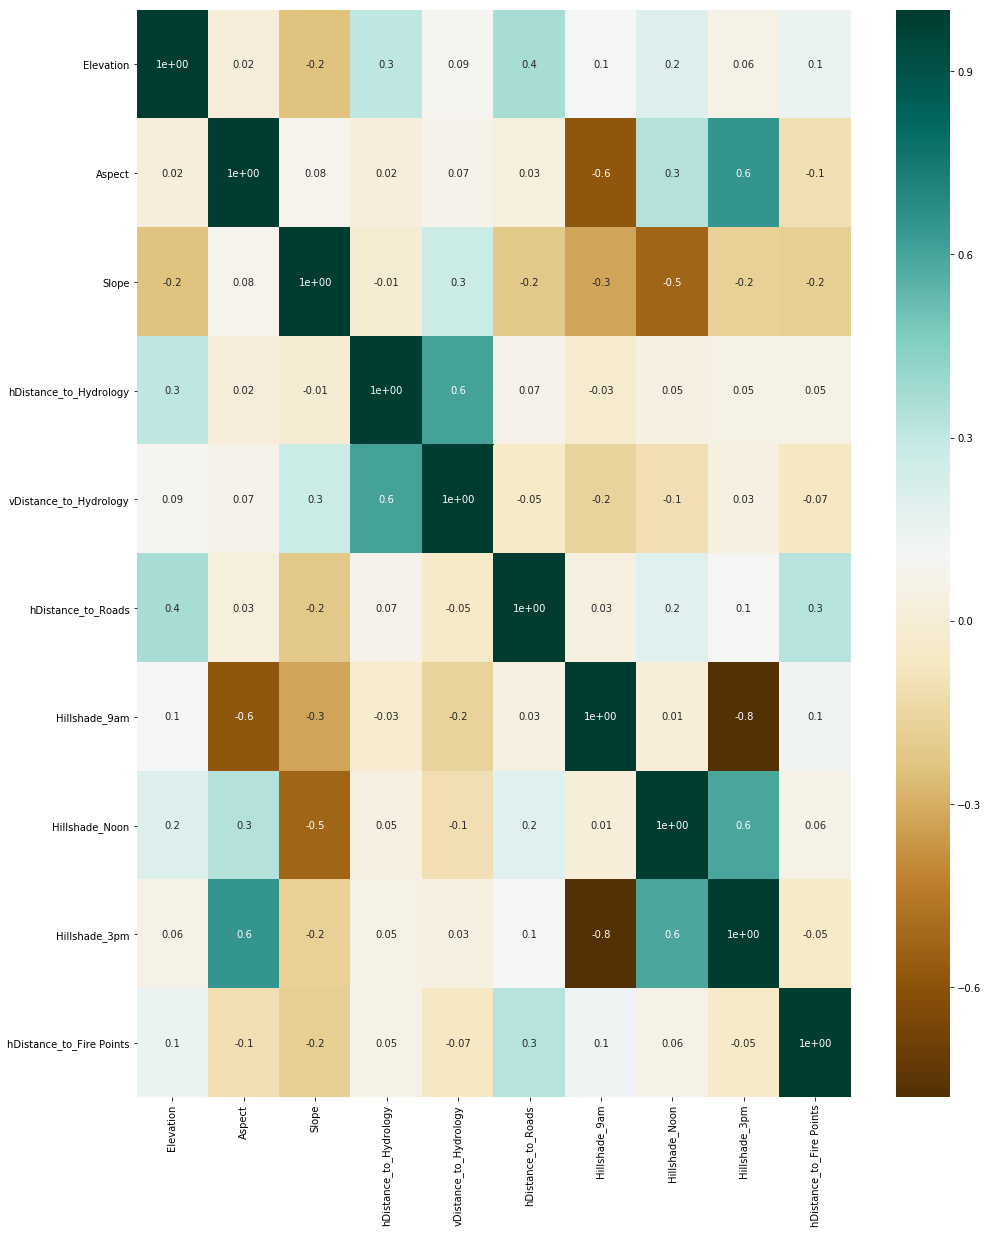

In [32]:
%matplotlib inline
cvt = df[quantitative]
corr = cvt.corr()
plt.figure(figsize=[16,20])
sns.heatmap(corr,annot=True, fmt=".1", cmap="BrBG")

Very quickly we can see how the Hillshade variables are correlated with eachother.  **Hillshade_9am** and **Hillshade_3pm** have the highest correlation among all of the continuous variables (-.8).  We also see that **Hillshade_3pm** is also highly correlated with **Hillshade_Noon** (.6).  Outside of the HIllshade variables we can see that the **Aspect** variable is correlated with **Hillshade_3pm** (.6) and **Hillshade_Noon** (-.6).  The variables **Slope** and **Hillshade_Noon** also have a relatively high correlation (-.5).  The last set of variables worth mentioning are the distance to hydrology variables.  The vertical and horizontal **Distance_to_Hydrology** have a correlation coefficient of .6.

When considering feature selection we try to avoid including variables with high levels of correlation.  Based on the correlation analysis we would need to investigate strategies to combine the variables mentioned above to build a better predictive model.

[top](#toc)
<a id='Attribute_Response'></a>
## Attribute - Response Relationship

In [33]:
df[quantitative + ['Cover_Type']].groupby(by='Cover_Type').mean()

,Elevation,Aspect,Slope,hDistance_to_Hydrology,vDistance_to_Hydrology,hDistance_to_Roads,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,hDistance_to_Fire Points
Cover_Type,,,,,,,,,,
Aspen,2787.417571,139.283051,16.641315,212.354893,50.610344,1349.765722,223.474876,219.035816,121.920889,1577.719794
Cottonwood/Willow,2223.939934,137.139425,18.528941,106.934838,41.186749,914.199490,228.345832,216.997088,111.392792,859.124135
Douglas-fir,2419.181897,180.539068,19.048886,159.853458,45.437439,1037.169805,192.844302,209.827662,148.284044,1055.351471
Krummholz,3361.928669,153.236226,14.255924,356.994686,69.474305,2738.250463,216.967723,221.746026,134.932033,2070.031594
Lodgepole Pine,2920.936061,152.060515,13.550499,279.916442,45.884219,2429.530799,213.844423,225.326596,142.983466,2168.154849
Ponderosa Pine,2394.509845,176.372490,20.770208,210.276473,62.446915,943.940734,201.918415,215.826537,140.367176,910.955949
Spruce/Fir,3128.644888,156.138227,13.127110,270.555245,42.156939,2614.834517,211.998782,223.430211,143.875038,2009.253517


In [34]:
df[quantitative + ['Cover_Type']].groupby(by='Cover_Type').median()

,Elevation,Aspect,Slope,hDistance_to_Hydrology,vDistance_to_Hydrology,hDistance_to_Roads,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,hDistance_to_Fire Points
Cover_Type,,,,,,,,,,
Aspen,2796,111,16,175,35,1282,228,224,128,1471
Cottonwood/Willow,2231,119,19,30,6,949,235,220,113,806
Douglas-fir,2428,173,19,134,34,966,196,213,150,942
Krummholz,3363,123,13,283,43,2654,221,224,140,1969
Lodgepole Pine,2935,127,13,240,30,2039,219,227,142,1846
Ponderosa Pine,2404,160,21,190,50,853,213,221,142,824
Spruce/Fir,3146,122,12,218,24,2389,216,226,144,1825


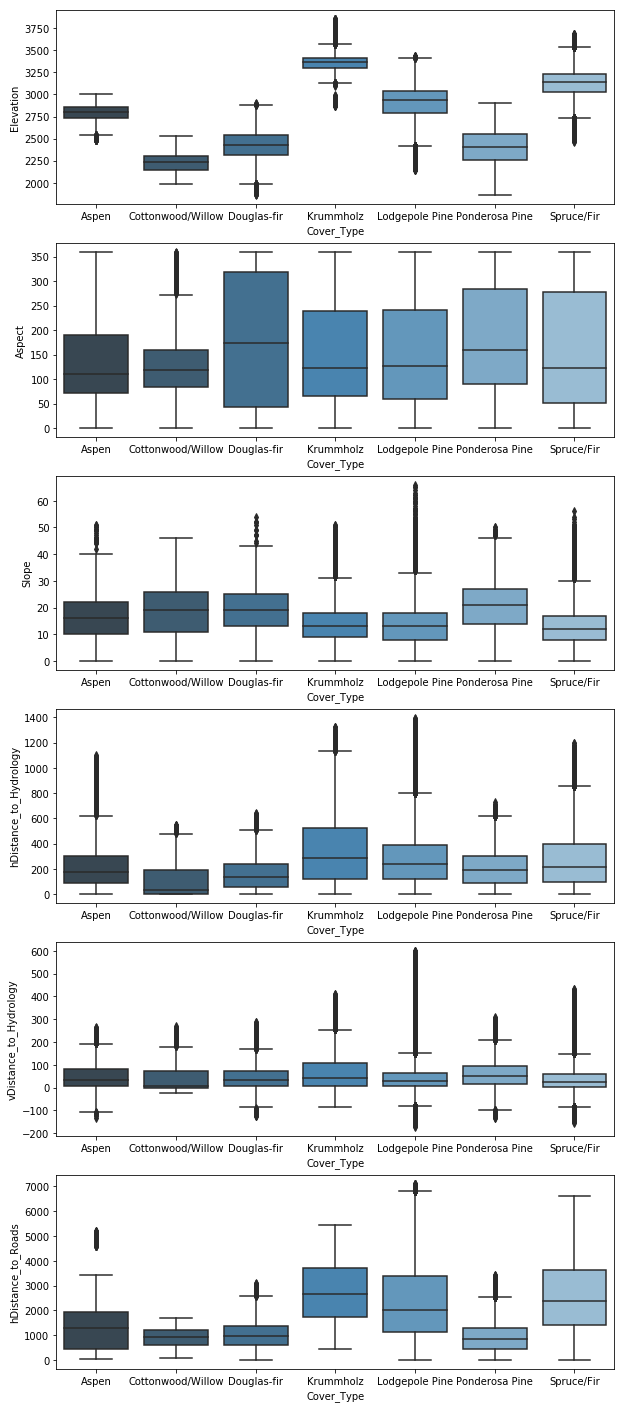

In [34]:
fig,axs=plt.subplots(6, figsize=(10,25))
sns.boxplot(x='Cover_Type',y='Elevation',data=df,ax=axs[0], palette = "Blues_d")#highest in 1 & 7 lowest in 4
sns.boxplot(x='Cover_Type',y='Aspect',data=df,ax=axs[1], palette = "Blues_d")
sns.boxplot(x='Cover_Type',y='Slope',data=df,ax=axs[2], palette = "Blues_d")
sns.boxplot(x='Cover_Type',y='hDistance_to_Hydrology',data=df,ax=axs[3], palette = "Blues_d")
sns.boxplot(x='Cover_Type',y='vDistance_to_Hydrology',data=df,ax=axs[4], palette = "Blues_d")
sns.boxplot(x='Cover_Type',y='hDistance_to_Roads',data=df,ax=axs[5], palette = "Blues_d")

## Analysis of Continuous Variables within each Cover Type
These boxplots help visualize the distribution of our continuous variables within each cover type.  Here You'll see that the majority of the variables dont have much of a distinct distribution when comparing between the cover types.  The exceptions seem to be the variables **Elevation**, **Slope**, **Horizontal Distance to Hydrology**, **Horizontal Distance to Roadways**, and **Horizontal Distance to Fire Points**.  This analysis can give us an idea of which variables to include when building a predictive model.

If there was one variable to highlight, it would be elevation.  The degree of distinction among between the cover types is quite easy to see from the box plots.

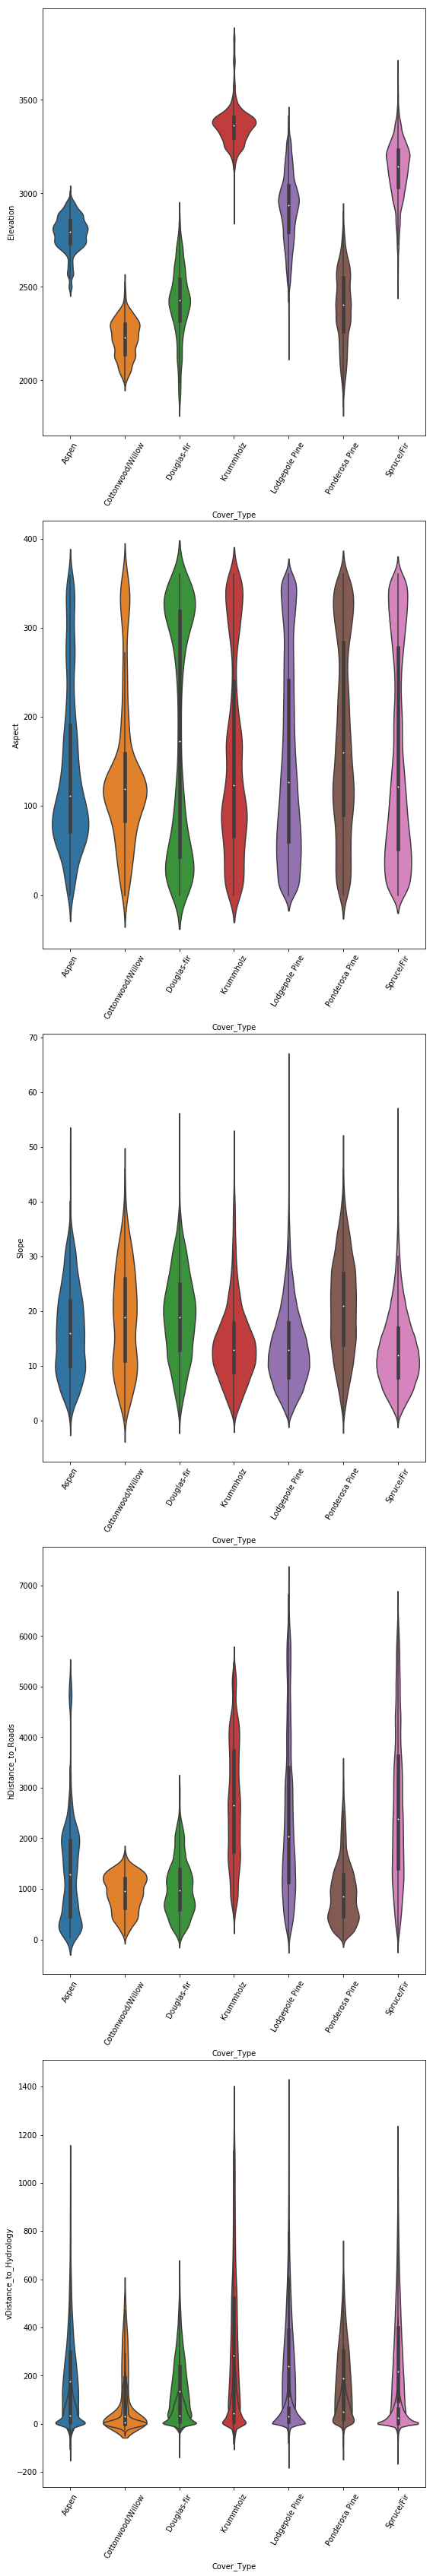

In [35]:
fig,axs=plt.subplots(5, figsize=(9,60))
sns.violinplot(x='Cover_Type',y='Elevation',data=df,ax=axs[0])
sns.violinplot(x='Cover_Type',y='Aspect',data=df,ax=axs[1])
sns.violinplot(x='Cover_Type',y='Slope',data=df,ax=axs[2])
sns.violinplot(x='Cover_Type',y='hDistance_to_Hydrology',data=df)
sns.violinplot(x='Cover_Type',y='vDistance_to_Hydrology',data=df)
sns.violinplot(x='Cover_Type',y='hDistance_to_Roads',data=df,ax=axs[3])
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=60)

[top](#toc)
<a id='Additional_Features'></a>
## Additional Features

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

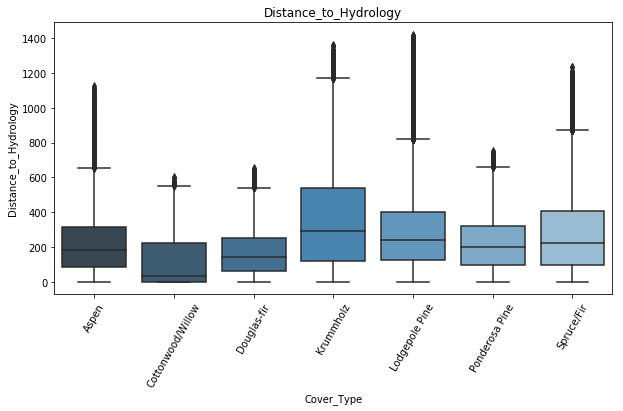

In [39]:
df["Distance_to_Hydrology"] = ( (df["hDistance_to_Hydrology"] ** 2) + \
                               (df["vDistance_to_Hydrology"] ** 2) ) ** (0.5)

plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Cover_Type',y='Distance_to_Hydrology',data=df, palette = "Blues_d")
ax.set_title('Distance_to_Hydrology')
plt.xticks(rotation=60)
#sns.swarmplot(x='Cover_Type', y="Distance_To_Hydrology", data=df, color=".25")

When reviewing our correlation analysis we observed that the **Distance_to_Hydrology** variables were highly correlated.  To help reduce the number of correlated variables we can find ways to combine certain data features.  Using the Pythagorean Theorem we can determine the straight distance to hydrology and create 1 variable that incorporates two highly correlated variables.

[top](#toc)
#### end